In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False
import warnings
warnings.simplefilter('ignore')
from sklearn.datasets import load_iris

- Softmax fuction

In [2]:
def fn(x):
    print( x/x.sum() )

In [52]:
def softmax(x):
    e = np.exp(x)
   # print(e)
    print( e/np.sum(e) )

In [4]:
a = np.array( [2, 1, 0.1] )
fn(a)
softmax( a )     # 확률이 가장 높은 것으로 판단해줌.

[0.64516129 0.32258065 0.03225806]
[7.3890561  2.71828183 1.10517092]
[0.65900114 0.24243297 0.09856589]


In [5]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df = pd.DataFrame( iris.data )
df.columns = iris.feature_names
df[ 'specis' ] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


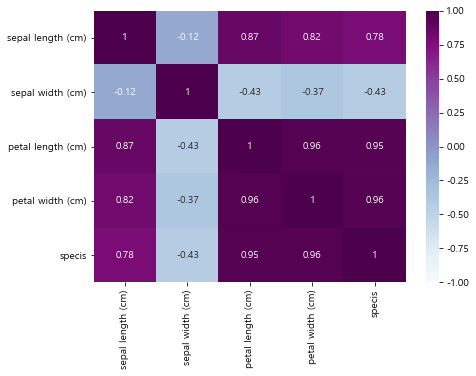

In [11]:
plt.figure( figsize=(7, 5) )
sns.heatmap( df.corr(), annot=True, cmap='BuPu', vmax=1, vmin=-1 )
plt.show()

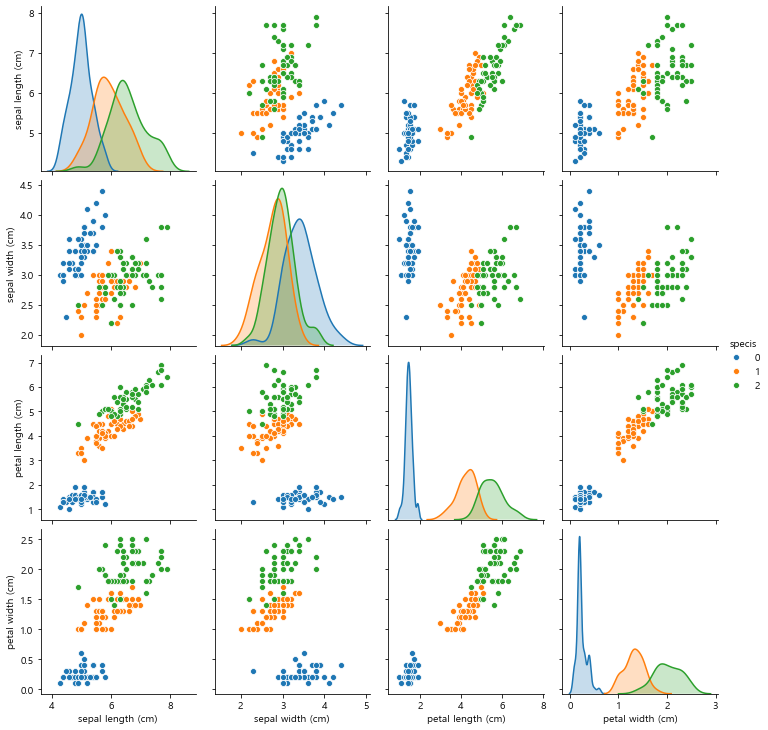

In [12]:
sns.pairplot( data=df, hue='specis' ); plt.show()

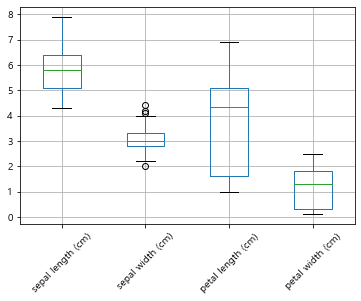

In [13]:
df.iloc[:, :-1 ].boxplot(rot=45);plt.show()

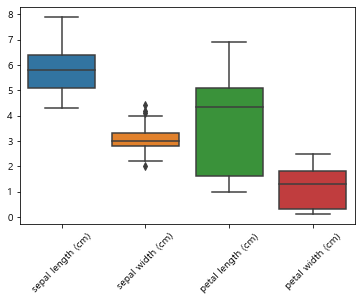

In [14]:
plt.xticks( rotation=45 )
sns.boxplot( data=df.iloc[:, :-1 ] );plt.show()

In [36]:
x_data = iris.data
y_data = iris.target
x_train, x_test, y_train, y_test  = train_test_split( x_data, y_data, test_size=0.2, stratify=y_data, random_state=1 )

In [37]:
model_logit = LogisticRegression(  multi_class = 'multinomial' )
model_logit.fit( x_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print(f'Accuracy of train data : { round(model_logit.score( x_train , y_train ), 3)*100 }%' )
print(f'Accuracy of test data  : { round(model_logit.score( x_test , y_test ), 3)*100   }%' )

Accuracy of train data : 96.7%
Accuracy of test data  : 96.7%


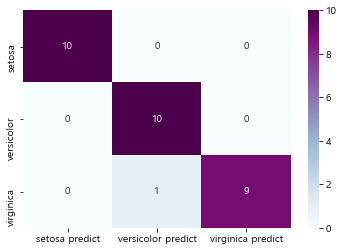

In [39]:
y_pred = model_logit.predict( x_test )
cm     = metrics.confusion_matrix( y_test, y_pred )
sns.heatmap( cm, annot=True, cmap='BuPu', xticklabels=['setosa predict', 'versicolor predict', 'virginica predict'], 
            yticklabels=iris.target_names)
plt.show()

In [40]:
model_logit.coef_

array([[-0.51418077,  0.77926692, -2.38300365, -0.96097857],
       [ 0.30080885, -0.27663283, -0.15953256, -0.76810102],
       [ 0.21337192, -0.50263409,  2.54253621,  1.72907959]])

In [67]:
model_logit.intercept_

array([ 10.43736141,   2.92425059, -13.361612  ])

In [42]:
print('Precision score of test data :',  round(metrics.precision_score( y_test, y_pred, average='macro' ), 2)*100,'%') 
print('Recall score of test data    : ', round(metrics.recall_score( y_test, y_pred, average='macro'  ), 2)*100,'%' )
print('F1 score of test data        : ', round(metrics.f1_score( y_test, y_pred, average='macro'  ), 2)*100,'%' )

Precision score of test data : 97.0 %
Recall score of test data    :  97.0 %
F1 score of test data        :  97.0 %


Multiple Classification : w의 개수 = feature의 개수 * class의 개수

ws1*x1 + ws2*x2 + ws3*x3 + ws3*x4 + setosa    

ws1*x1 + ws2*x2 + ws3*x3 + ws3*x4 + versicolor

ws1*x1 + ws2*x2 + ws3*x3 + ws3*x4 + virginica

In [43]:
x_test.shape

(30, 4)

In [44]:
model_logit.coef_.T

array([[-0.51418077,  0.30080885,  0.21337192],
       [ 0.77926692, -0.27663283, -0.50263409],
       [-2.38300365, -0.15953256,  2.54253621],
       [-0.96097857, -0.76810102,  1.72907959]])

In [84]:
np.matmul( x_test, model_logit.coef_.T ) + model_logit.intercept_ 

array([[ -7.79896862,   1.93028308,   5.86868554],
       [  6.66299974,   3.22454327,  -9.887543  ],
       [  1.55711938,   2.44328488,  -4.00040426],
       [  6.61379967,   3.01870917,  -9.63250884],
       [  6.20449878,   2.74396725,  -8.94846603],
       [  7.01407286,   3.11319506, -10.12726792],
       [ -5.17952231,   1.22060572,   3.95891659],
       [ -5.20515351,   1.79760413,   3.40754938],
       [ -3.8587786 ,   1.51629669,   2.34248191],
       [ -3.66090801,   2.35408118,   1.30682683],
       [  7.21763005,   2.95511764, -10.17274768],
       [ -1.37960569,   2.30578223,  -0.92617654],
       [ -5.84584219,   1.64941111,   4.19643108],
       [ -1.42632919,   2.71428025,  -1.28795105],
       [ -4.38227711,   1.61341417,   2.76886295],
       [  6.97640854,   2.87513737,  -9.85154591],
       [ -6.95329788,   1.67584074,   5.27745714],
       [ -1.29848069,   2.34795113,  -1.04947044],
       [  0.9632256 ,   2.43973673,  -3.40296233],
       [ -3.76781988,   1.76499

In [85]:
model_logit.predict_proba( x_test )

array([[1.13719335e-06, 1.91070938e-02, 9.80891769e-01],
       [9.68884956e-01, 3.11149810e-02, 6.28728036e-08],
       [2.91573381e-01, 7.07301636e-01, 1.12498317e-03],
       [9.73275522e-01, 2.67243923e-02, 8.56157496e-08],
       [9.69543419e-01, 3.04563264e-02, 2.54517860e-07],
       [9.80176723e-01, 1.98232419e-02, 3.52301646e-08],
       [1.00916851e-04, 6.07440821e-02, 9.39155001e-01],
       [1.51474784e-04, 1.66570981e-01, 8.33277545e-01],
       [1.40780297e-03, 3.04023680e-01, 6.94568517e-01],
       [1.80432973e-03, 7.38911659e-01, 2.59284011e-01],
       [9.86108790e-01, 1.38911823e-02, 2.76299275e-08],
       [2.35658521e-02, 9.39348581e-01, 3.70855669e-02],
       [4.03583202e-05, 7.26240107e-02, 9.27335631e-01],
       [1.53870969e-02, 9.66942211e-01, 1.76706917e-02],
       [5.95857498e-04, 2.39352543e-01, 7.60051599e-01],
       [9.83717826e-01, 1.62821256e-02, 4.83707456e-08],
       [4.74853740e-06, 2.65550517e-02, 9.73440200e-01],
       [2.46181835e-02, 9.43802

In [46]:
model_logit.predict_proba( x_test ).argmax( axis=1 )

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1], dtype=int64)

In [47]:
model_logit.predict( x_test )

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [48]:
model_logit.predict_proba( [[5.2, 3.5, 1.5, 0.2 ]] ).argmax( axis=1 )

array([0], dtype=int64)

In [49]:
model_logit.predict( [[5.2, 3.5, 1.5, 0.2 ]] )

array([0])